In [1]:
#import pandas as pd, numpy as np, matplotlib.pyplot as plt
from notebooks_tools import * 
%matplotlib inline

In [2]:
data = pd.read_csv('/Users/erezcohen/Desktop/uBoone/analysis/AnaFiles/BNB_ANA/Features_larlite_BNB5e19_mu-p_maxp_pscore0.9_Dec2016.csv')
mixed = pd.read_csv('/Users/erezcohen/Desktop/uBoone/analysis/AnaFiles/BNB_ANA/Features_larlite_BNB5e19_mu-p_maxp_pscore0.9_Dec2016_mixed.csv')

In [3]:
MCBNB_gen = pd.read_csv('/Users/erezcohen/Desktop/uBoone/AnalysisTreesAna/FeaturesFiles/g4_features_MC_BNB_AnalysisTrees.csv')
MCBNB_gen_protons = MCBNB_gen[(MCBNB_gen.pdg==2212) & (MCBNB_gen.primary==1)]
MCBNB_rec = pd.read_csv('/Users/erezcohen/Desktop/uBoone/AnalysisTreesAna/FeaturesFiles/full_features_MC_BNB_AnalysisTrees.csv')
MCBNB_rec_protons = MCBNB_rec[(MCBNB_rec.MCpdgCode==2212)  & (MCBNB_rec.process_primary==1)]

In [33]:
MCBNB_gen_CCQE_protons = MCBNB_gen_protons[MCBNB_gen_protons.truth_ccnc==1]
print 'MCBNB CCQE generated protons: ',len(MCBNB_gen_CCQE_protons)
print 'MCBNB generated protons: ',len(MCBNB_gen_protons)

MCBNB_rec_CCQE_protons = MCBNB_rec_protons[(MCBNB_rec_protons.truth_ccnc==1) & (MCBNB_rec_CCQE_protons.length>1.5)]
print 'MCBNB CCQE rec. protons: ',len(MCBNB_rec_CCQE_protons)
print 'MCBNB rec. protons: ',len(MCBNB_rec_protons)

MCBNB CCQE generated protons:  43714
MCBNB generated protons:  369804
MCBNB CCQE rec. protons:  20685
MCBNB rec. protons:  134019


(0, 1600)

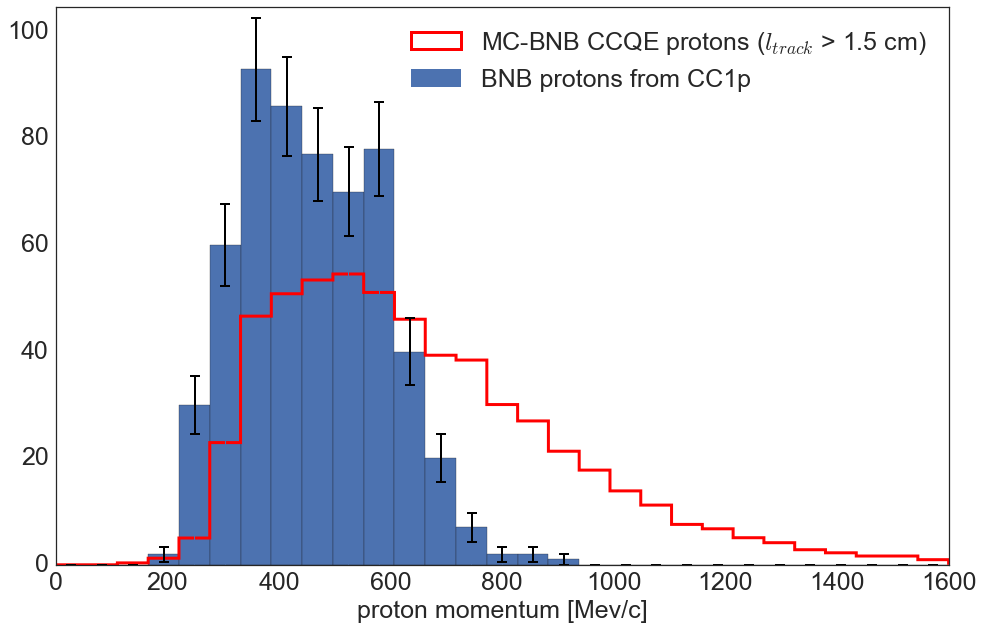

In [34]:
bins=np.linspace(0,1600,30)
ax , h , bins , patches = plot_1d_hist( data.p_P , 
                                       bins=bins ,
                                       xlabel='proton momentum [Mev/c]' , figsize=(16,10));
weights = (float(len(data))/len(MCBNB_rec_CCQE_protons))*(MCBNB_rec_CCQE_protons.truth_P/MCBNB_rec_CCQE_protons.truth_P)
plt.hist(1000*MCBNB_rec_CCQE_protons.truth_P,bins=bins,weights=weights
         ,label='MC-BNB CCQE protons ($l_{track}$ > 1.5 cm)',histtype='step',linewidth=3,color='red')

mid = 0.5*(bins[1:] + bins[:-1])
ax.bar(mid, h, yerr=np.sqrt(h), linewidth=0,error_kw=dict(ecolor='black', lw=2, capsize=5, capthick=2),label='BNB protons from CC1p')
plt.legend(loc='best',fontsize=25)
ax.set_ylim(0,1.02*np.max(h+np.sqrt(h)))
ax.set_xlim(0,1600)

(0, 100.40266075469773)

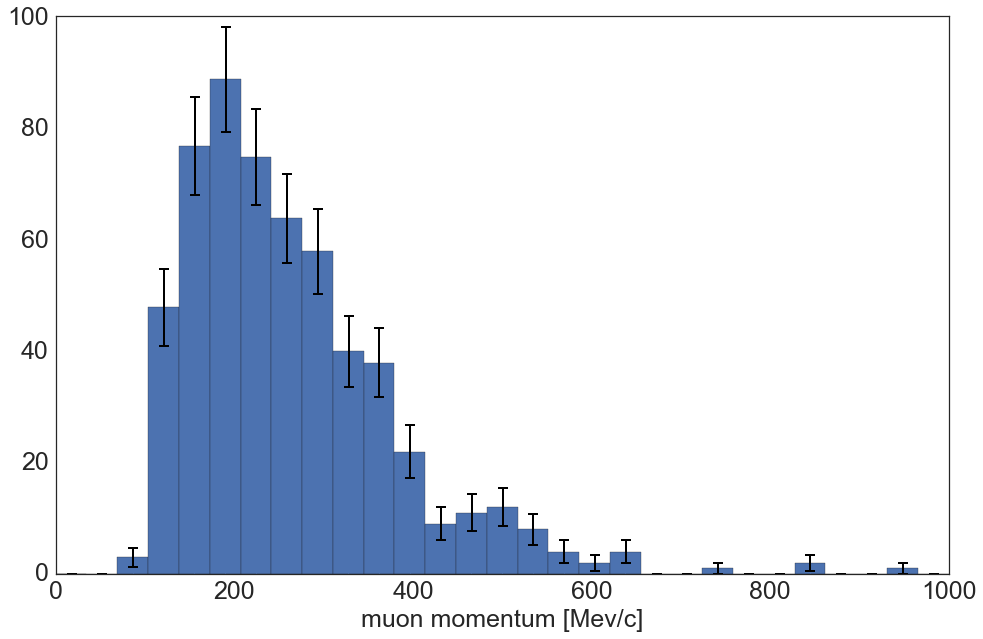

In [4]:
ax , h , bins , patches = plot_1d_hist( data.mu_P , 
                                       bins=np.linspace(0,1000,30) ,
                                       xlabel='muon momentum [Mev/c]' , figsize=(16,10));
mid = 0.5*(bins[1:] + bins[:-1])
ax.bar(mid, h, yerr=np.sqrt(h), linewidth=0,error_kw=dict(ecolor='black', lw=2, capsize=5, capthick=2))
ax.set_ylim(0,1.02*np.max(h+np.sqrt(h)))

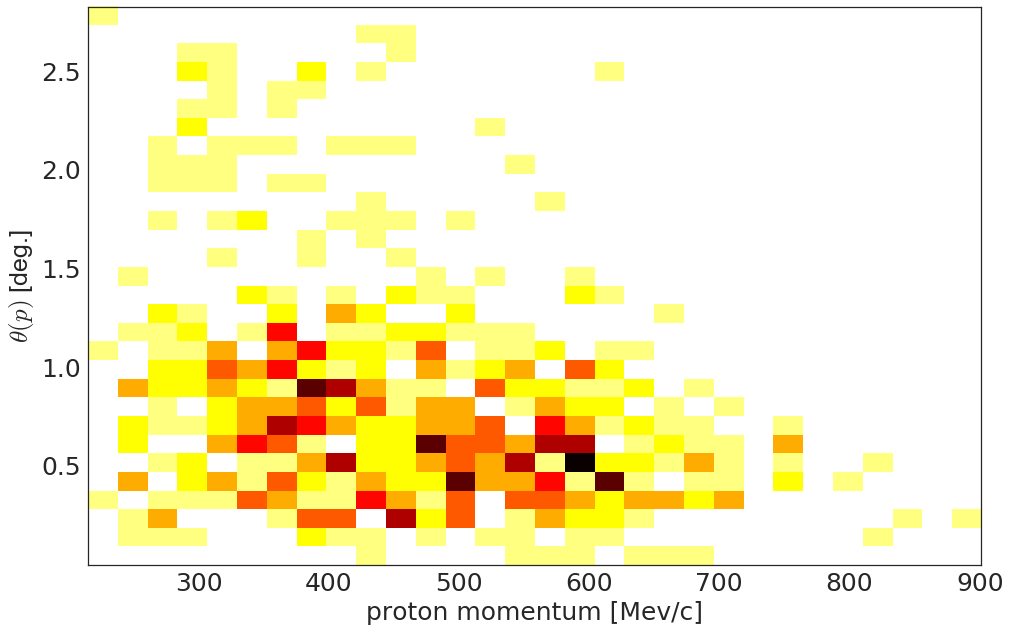

In [47]:
plot_2d_hist( data.p_P , data.p_theta , bins=30 , cmap='hot_r',
             xlabel='proton momentum [Mev/c]' , ylabel='$\\theta(p)$ [deg.]' , 
             figsize=(16,10) , fontsize=25 , weights=None);

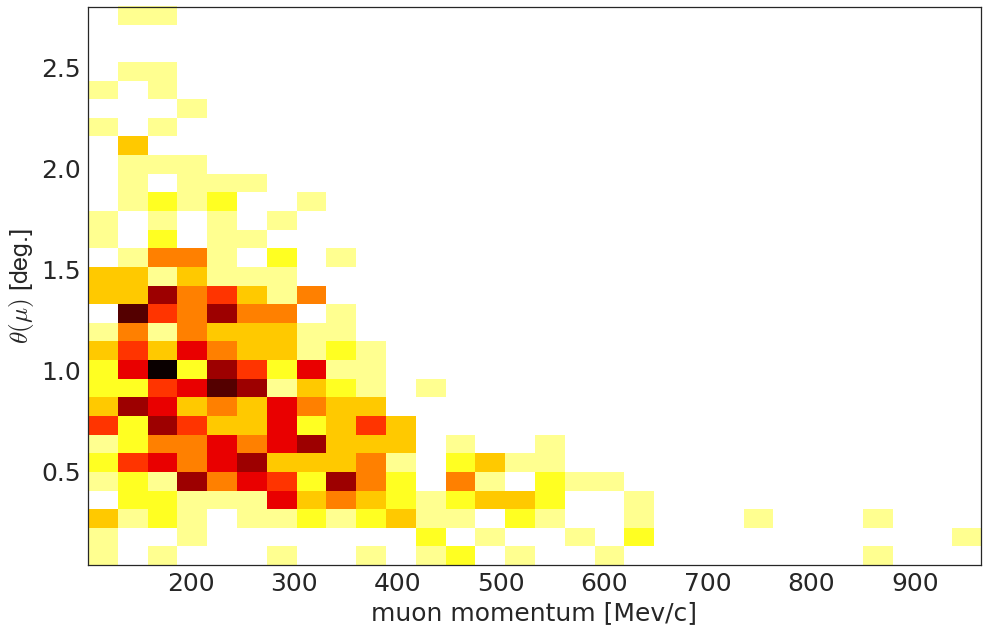

In [48]:
plot_2d_hist( data.mu_P , data.mu_theta , bins=30 , cmap='hot_r',
             xlabel='muon momentum [Mev/c]' , ylabel='$\\theta(\\mu)$ [deg.]' , 
             figsize=(16,10) , fontsize=25 , weights=None);

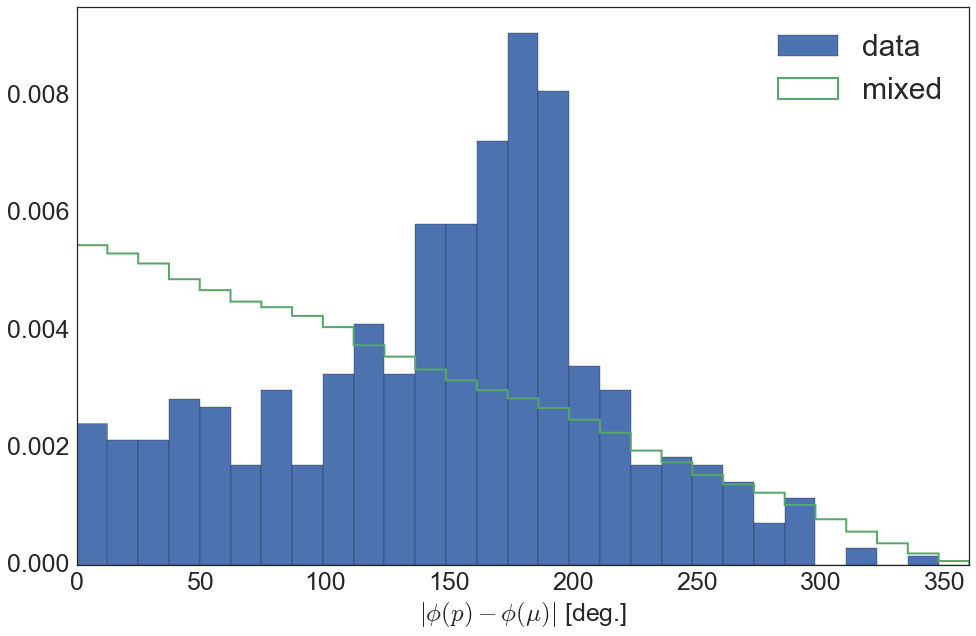

In [17]:
ax , h , bins , patches = plot_1d_hist( 180/3.14*np.abs(data.mu_phi - data.p_phi) ,                                         
                                       bins=np.linspace(0,360,30) ,                                                                              
                                       xlabel='$|\\phi(p)-\\phi(\\mu)|$ [deg.]' ,                                       
                                       label = 'data',
                                       figsize=(16,10),
                                       normed=1);
plt.hist(180/3.14*np.abs(mixed.mu_phi - mixed.p_phi),histtype='step',label='mixed',linewidth=2,normed=1,bins=np.linspace(0,360,30));

mid = 0.5*(bins[1:] + bins[:-1])
# ax.bar(mid, h, yerr=np.sqrt(h), linewidth=0,error_kw=dict(ecolor='black', lw=2, capsize=5, capthick=2))
# ax.set_ylim(0,1.02*np.max(h+np.sqrt(h)))
ax.set_xlim(0,360)
plt.legend(loc='upper right',fontsize=30)

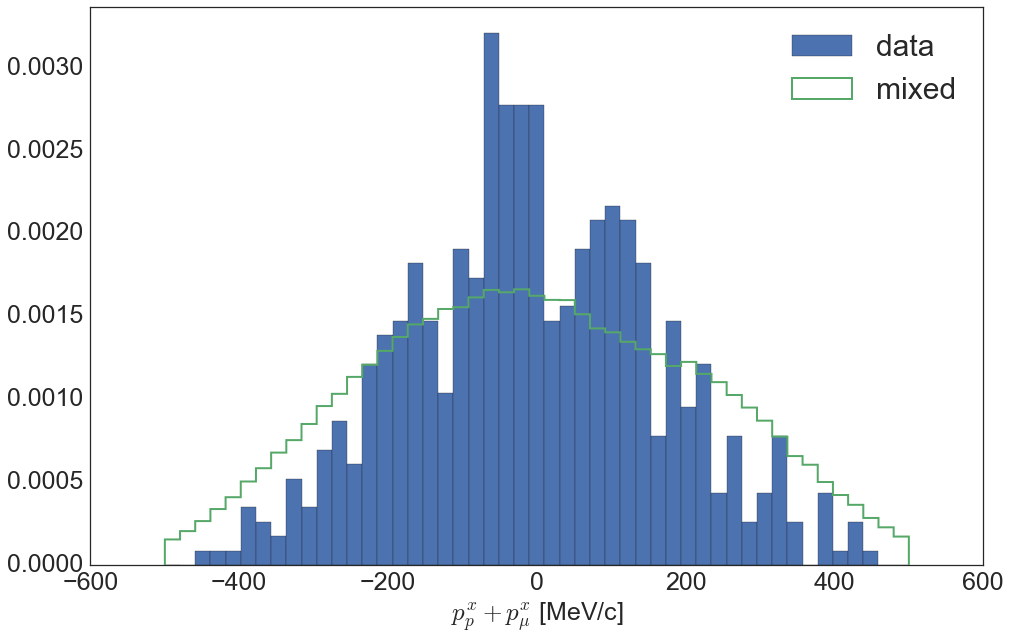

In [25]:
Px_mu_p = data.mu_P*np.sin(data.mu_theta)*np.cos(data.mu_phi)+data.p_P*np.sin(data.p_theta)*np.cos(data.p_phi)
mixed_Px_mu_p = mixed.mu_P*np.sin(mixed.mu_theta)*np.cos(mixed.mu_phi)+mixed.p_P*np.sin(mixed.p_theta)*np.cos(mixed.p_phi)

bins=np.linspace(-500,500,50)
ax , h , bins , patches = plot_1d_hist( Px_mu_p ,                                         
                                       bins=bins ,                                                                              
                                       xlabel='$p_p^x+p_{\\mu}^x$ [MeV/c]' ,                                       
                                       label = 'data',
                                       figsize=(16,10),
                                       normed=1);
plt.hist(mixed_Px_mu_p,histtype='step',label='mixed',linewidth=2,normed=1,bins=bins);
mid = 0.5*(bins[1:] + bins[:-1])
plt.legend(loc='upper right',fontsize=30)

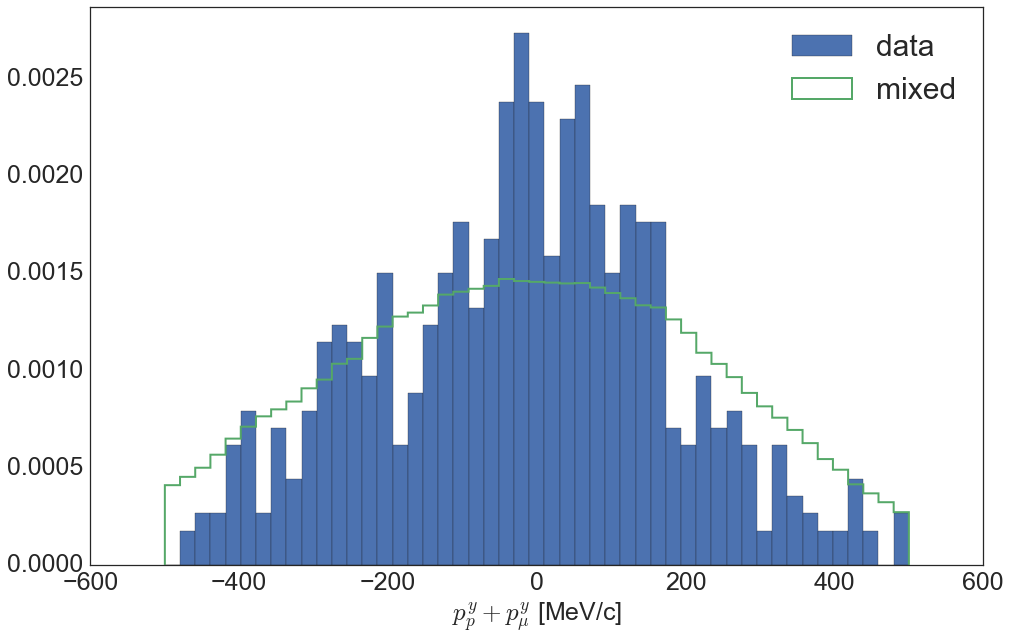

In [26]:
Py_mu_p = data.mu_P*np.sin(data.mu_theta)*np.sin(data.mu_phi)+data.p_P*np.sin(data.p_theta)*np.sin(data.p_phi)
mixed_Py_mu_p = mixed.mu_P*np.sin(mixed.mu_theta)*np.sin(mixed.mu_phi)+mixed.p_P*np.sin(mixed.p_theta)*np.sin(mixed.p_phi)

bins=np.linspace(-500,500,50)
ax , h , bins , patches = plot_1d_hist( Py_mu_p ,                                         
                                       bins=bins ,                                                                              
                                       xlabel='$p_p^y+p_{\\mu}^y$ [MeV/c]' ,                                       
                                       label = 'data',
                                       figsize=(16,10),
                                       normed=1);
plt.hist(mixed_Py_mu_p,histtype='step',label='mixed',linewidth=2,normed=1,bins=bins);
mid = 0.5*(bins[1:] + bins[:-1])
plt.legend(loc='upper right',fontsize=30)

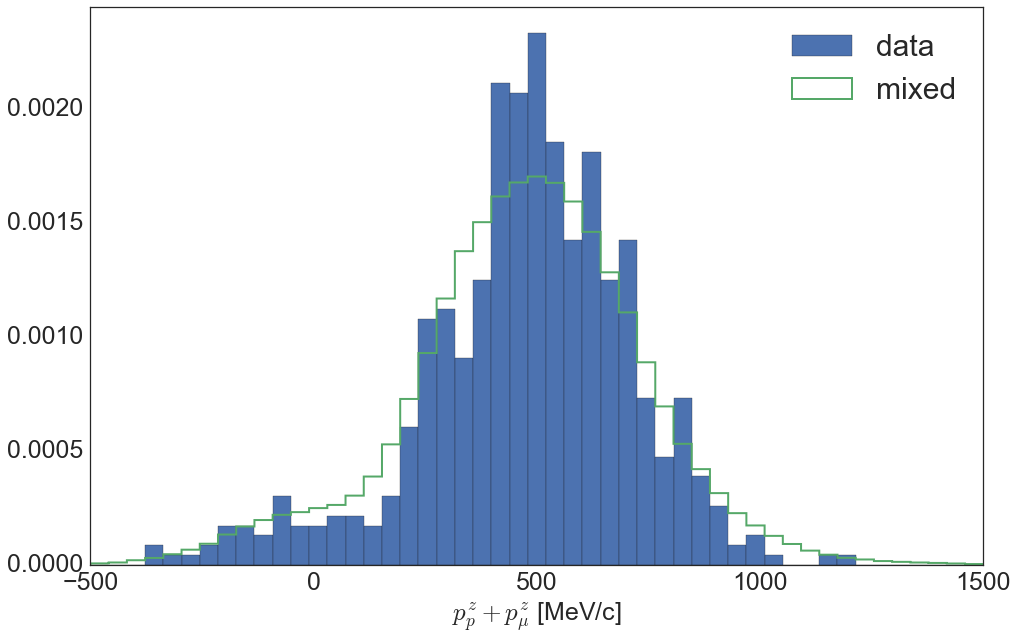

In [29]:
Pz_mu_p = data.mu_P*np.cos(data.mu_theta)+data.p_P*np.cos(data.p_theta)
mixed_Pz_mu_p = mixed.mu_P*np.cos(mixed.mu_theta)+mixed.p_P*np.cos(mixed.p_theta)

bins=np.linspace(-500,1500,50)
ax , h , bins , patches = plot_1d_hist( Pz_mu_p ,                                         
                                       bins=bins ,                                                                              
                                       xlabel='$p_p^z+p_{\\mu}^z$ [MeV/c]' ,                                       
                                       label = 'data',
                                       figsize=(16,10),
                                       normed=1);
plt.hist(mixed_Pz_mu_p,histtype='step',label='mixed',linewidth=2,normed=1,bins=bins);
mid = 0.5*(bins[1:] + bins[:-1])
plt.legend(loc='upper right',fontsize=30)